#**Part A**

In [515]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,recall_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve
from sklearn.linear_model import LogisticRegression

In [461]:
df=pd.read_csv('Surgical.csv')
df.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,baseline_psych,baseline_pulmonary,ahrq_ccs,ccsComplicationRate,ccsMort30Rate,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,0,0,19,0.183370,0.007424,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,0,0,1,0.312029,0.016673,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,0,0,6,0.150706,0.001962,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,0,0,7,0.056166,0.000000,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,0,0,11,0.197305,0.002764,0.00,0,0,7.88,11,0,0,0.00,1,0


In [462]:
df[df['complication'].isnull()]

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,baseline_psych,baseline_pulmonary,ahrq_ccs,ccsComplicationRate,ccsMort30Rate,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication


In [463]:
df_random=df.sample(frac=1).reset_index(drop=True)
train=df_random[:int(0.75*len(df))]
test=df_random[int(0.75*len(df)):]
#split train data to labeled and unlabeled
train_random=train.sample(frac=1).reset_index(drop=True)
train_labeled=train_random[:int(0.01*len(train_random))]
train_unlabeled=train_random[int(0.01*len(train_random)):]

In [464]:
train_labeled

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,baseline_psych,baseline_pulmonary,ahrq_ccs,ccsComplicationRate,ccsMort30Rate,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,28.98,90.0,1,0,0,1,0,0,0,1,0,0,0,0.081977,0.002959,-1.97,0,1,9.12,8,0,0,-2.25,1,0
1,41.69,71.6,1,0,0,1,0,0,0,1,0,0,5,0.097476,0.007398,-1.39,1,1,8.53,8,3,0,-2.09,1,0
2,38.58,49.8,1,0,1,1,0,1,1,0,0,0,3,0.190355,0.012690,-1.65,2,0,7.42,8,1,0,-0.61,1,0
3,45.55,57.3,1,0,1,0,0,0,0,0,0,1,19,0.183370,0.007424,0.45,4,0,16.53,2,3,0,0.63,0,1
4,33.20,68.5,1,0,0,1,0,0,0,0,0,0,19,0.183370,0.007424,1.97,2,0,11.68,8,0,0,0.40,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,41.10,49.5,0,1,3,1,0,1,0,0,0,0,20,0.016118,0.000672,-1.07,3,0,10.32,4,0,0,-0.43,0,0
105,40.93,46.1,0,0,0,0,0,0,0,0,0,0,6,0.150706,0.001962,0.00,1,0,10.80,7,0,0,0.00,1,0
106,47.75,59.3,1,1,3,1,0,1,0,0,0,0,10,0.049774,0.002262,-0.76,1,0,7.72,4,3,0,-0.14,1,0
107,36.38,56.6,0,1,2,1,0,0,0,0,0,0,13,0.109369,0.000373,-0.50,4,1,8.40,0,2,0,-0.72,1,1


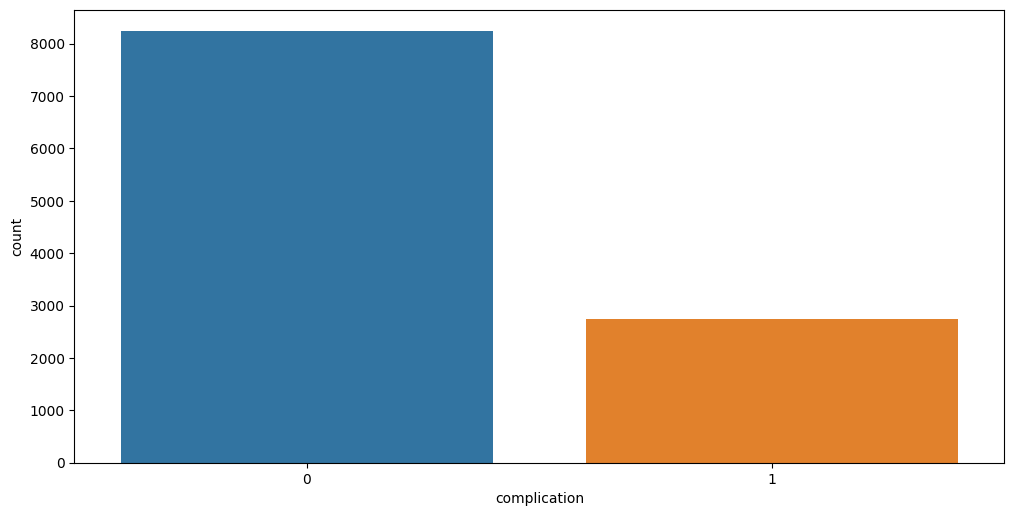

In [465]:
plt.figure(figsize=(12,6),dpi=100)
sns.countplot(data=train,x='complication');

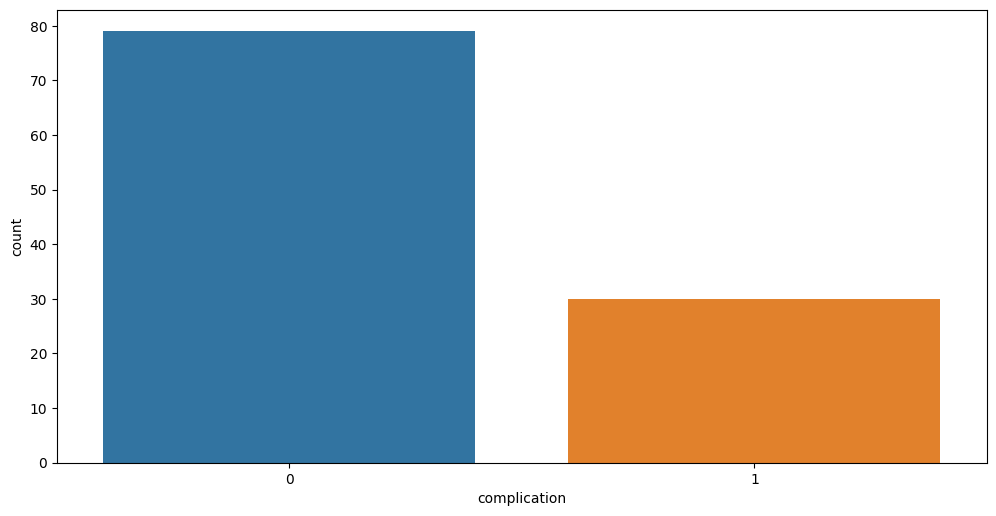

In [466]:
plt.figure(figsize=(12,6),dpi=100)
sns.countplot(data=train_labeled,x='complication');

#**Part B**

#Training a Classifier using logistic regression

In [467]:
log_model = LogisticRegression(solver='newton-cg')

In [468]:
X = train_labeled.drop('complication',axis=1)
y = train_labeled['complication']

In [469]:
log_model.fit(X,y)

LogisticRegression(solver='newton-cg')

In [470]:
log_model.coef_

array([[-2.37034204e-02,  1.54966992e-03,  7.66747456e-01,
         2.86665279e-02,  1.31757214e-01, -4.99794882e-01,
         8.25300999e-01, -5.67219032e-01,  2.81727816e-01,
        -2.47659970e-02,  1.06048008e-01, -3.11827724e-01,
         2.07513628e-04, -8.55173481e-02,  2.37743116e-03,
         9.99190327e-01,  6.43780017e-02,  8.14367892e-01,
        -3.72128317e-02, -1.43373781e-01, -2.80502337e-01,
         0.00000000e+00,  7.00198792e-01,  5.18101736e-01]])

In [471]:
log_model.predict_proba(X)

array([[9.57556404e-01, 4.24435961e-02],
       [9.70967625e-01, 2.90323746e-02],
       [9.51590292e-01, 4.84097081e-02],
       [5.29274367e-01, 4.70725633e-01],
       [1.44062085e-01, 8.55937915e-01],
       [9.94195902e-01, 5.80409802e-03],
       [7.07161519e-01, 2.92838481e-01],
       [4.55004148e-01, 5.44995852e-01],
       [9.58510695e-01, 4.14893054e-02],
       [8.92335670e-01, 1.07664330e-01],
       [7.38613195e-01, 2.61386805e-01],
       [9.57556404e-01, 4.24435961e-02],
       [6.52663547e-01, 3.47336453e-01],
       [9.95750859e-01, 4.24914138e-03],
       [7.84808789e-01, 2.15191211e-01],
       [4.30416697e-01, 5.69583303e-01],
       [9.57556404e-01, 4.24435961e-02],
       [6.14267318e-01, 3.85732682e-01],
       [7.30576883e-01, 2.69423117e-01],
       [7.51443261e-01, 2.48556739e-01],
       [7.67784785e-04, 9.99232215e-01],
       [9.86373942e-01, 1.36260582e-02],
       [9.03070719e-01, 9.69292812e-02],
       [8.44867097e-01, 1.55132903e-01],
       [8.303233

# **Evaluate on Train data(1%)**

In [472]:
y_pred = log_model.predict(X)

In [473]:
accuracy_score(y,y_pred)

0.8165137614678899

In [474]:
f1_score(y,y_pred,average=None)

array([0.87804878, 0.62962963])

#Plot Confusion Matrix

In [475]:
confusion_matrix(y,y_pred)

array([[72,  7],
       [13, 17]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


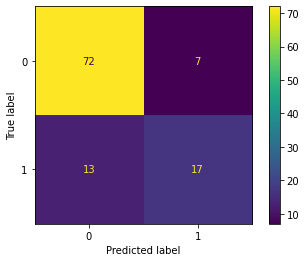

In [476]:
plot_confusion_matrix(log_model,X,y);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


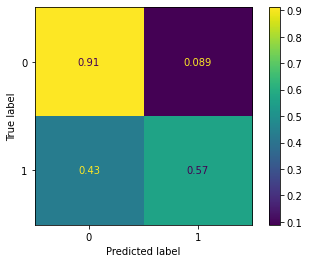

In [477]:
plot_confusion_matrix(log_model,X,y,normalize='true');

#Classification Report

In [478]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        79
           1       0.71      0.57      0.63        30

    accuracy                           0.82       109
   macro avg       0.78      0.74      0.75       109
weighted avg       0.81      0.82      0.81       109



#Precision - Recall Curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


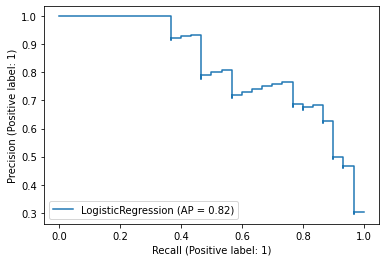

In [479]:
plot_precision_recall_curve(log_model,X,y)

#ROC Curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


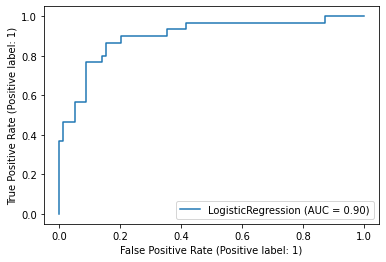

In [480]:
plot_roc_curve(log_model,X,y)

# **Evaluate on Test data(25%)**

In [481]:
X_test=test.drop('complication',axis=1)
y_test=test['complication']
y_pred_test = log_model.predict(X_test)

In [482]:
accuracy_score(y_test,y_pred_test)

0.7441924022957093

In [483]:
f1_score(y_test,y_pred_test,average=None)

array([0.83074141, 0.47651007])

#Plot Confusion Matrix

In [484]:
confusion_matrix(y_test,y_pred_test)

array([[2297,  412],
       [ 524,  426]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


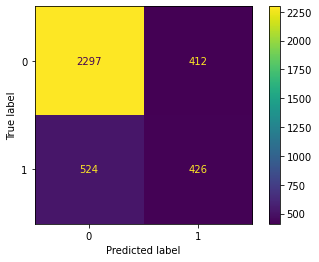

In [485]:
plot_confusion_matrix(log_model,X_test,y_test);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


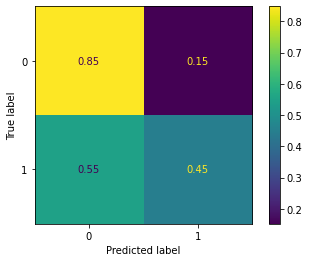

In [486]:
plot_confusion_matrix(log_model,X_test,y_test,normalize='true');

#Classification Report

In [487]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      2709
           1       0.51      0.45      0.48       950

    accuracy                           0.74      3659
   macro avg       0.66      0.65      0.65      3659
weighted avg       0.73      0.74      0.74      3659



#Precision - Recall Curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


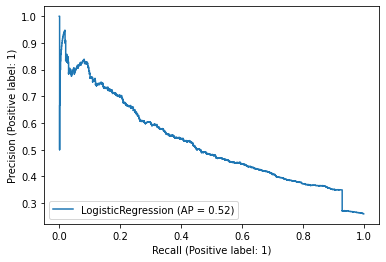

In [488]:
plot_precision_recall_curve(log_model,X_test,y_test)

#ROC Curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


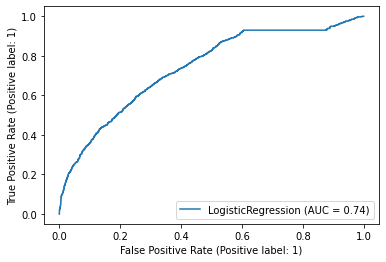

In [489]:
plot_roc_curve(log_model,X_test,y_test)

#**Part C**

In [490]:
X_unlabeled=train_unlabeled.drop('complication',axis=1).values

#Creat self-trainig algorithm

In [518]:
def self_training(X_train,y_train,unlabeled_data,X_test,y_test,thresh=0.9):
  log_model = LogisticRegression(solver='newton-cg')
  X_labeled=X_train.copy()
  y_labeled=y_train.copy()
  X_unlabeled=unlabeled_data.copy()
  count=[1]
  Acc=[]
  F1=np.zeros(2)
  Rec=np.zeros(2)
  while count[-1]!=0:
    log_model.fit(X_labeled,y_labeled)
    Acc.append(accuracy_score(y_test,log_model.predict(X_test)))
    F1=np.vstack((F1,f1_score(y_test,log_model.predict(X_test),average=None)))
    Rec=np.vstack((Rec,recall_score(y_test,log_model.predict(X_test),average=None)))
    prob=log_model.predict_proba(X_unlabeled)#an array with size (n,2)
    lst=[]
    for i,row in enumerate(prob):
      if np.max(row)>=thresh:
        lst.append(i)
        X_labeled=np.vstack((X_labeled,X_unlabeled[i,:]))
        y_labeled=np.hstack((y_labeled,np.argmax(row)))
    count.append(len(lst))
    X_unlabeled=np.delete(X_unlabeled, lst,0)
  count[0]=0
  return count,Acc,np.delete(F1,0,0),np.delete(Rec,0,0),log_model


In [519]:
count,Accuracy,F1_score,Recall,log_model=self_training(X.values,y.values,X_unlabeled,X_test.values,y_test.values,thresh=0.95)

#Number of labeled data vs Iterations(Criteria=95)

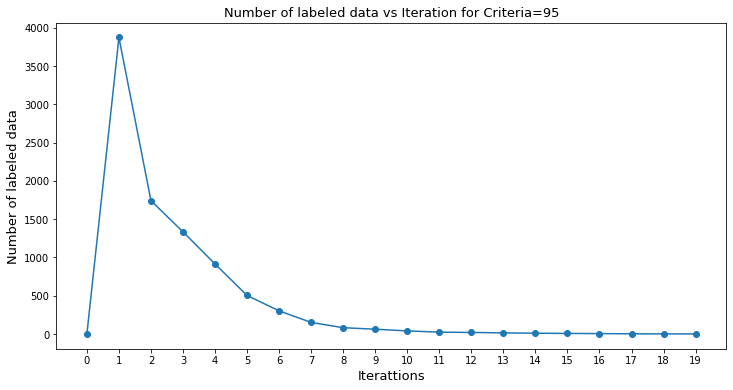

In [501]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,len(count)),count,marker='o')
plt.xlabel('Iterattions',size=13)
plt.ylabel('Number of labeled data',size=13)
plt.title('Number of labeled data vs Iteration for Criteria=95',size=13)
plt.xticks(np.arange(0,len(count)));

#Accuracy vs Iterations(Criteria=95)

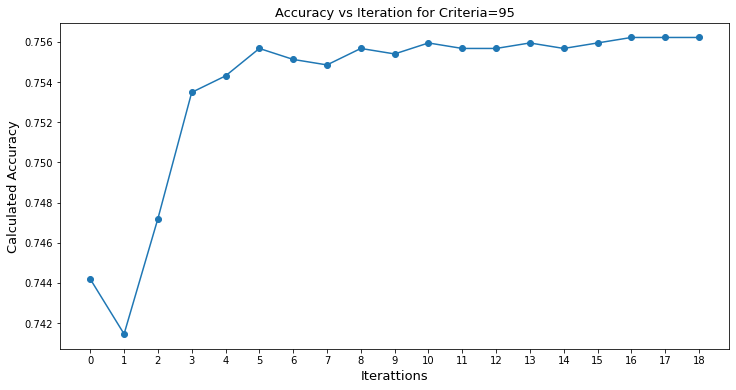

In [500]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,len(Accuracy)),Accuracy,marker='o')
plt.xlabel('Iterattions',size=13)
plt.ylabel('Calculated Accuracy',size=13)
plt.title('Accuracy vs Iteration for Criteria=95',size=13)
plt.xticks(np.arange(0,len(Accuracy)));

#F1-Score vs Iterations(Criteria=95)

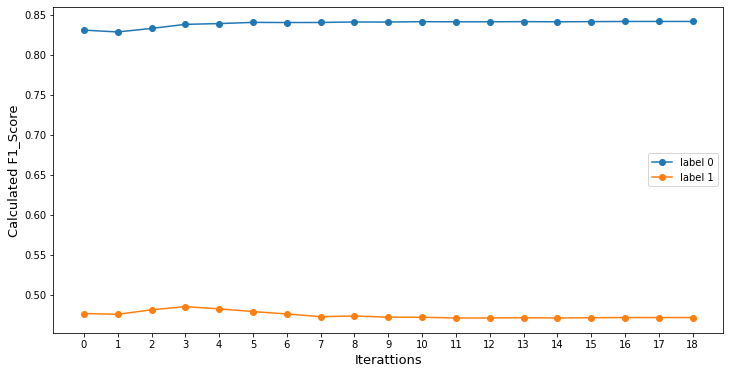

In [495]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,F1_score.shape[0]),F1_score[:,0],marker='o',label='label 0')
plt.plot(np.arange(0,F1_score.shape[0]),F1_score[:,1],marker='o',label='label 1')
plt.xlabel('Iterattions',size=13)
plt.ylabel('Calculated F1_Score',size=13)
plt.xticks(np.arange(0,F1_score.shape[0]))
plt.legend();

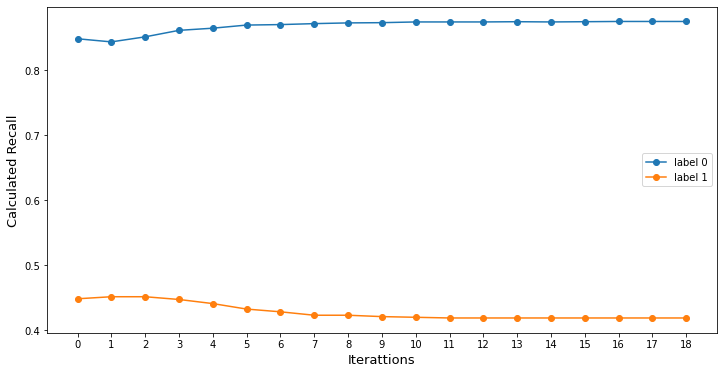

In [521]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,Recall.shape[0]),Recall[:,0],marker='o',label='label 0')
plt.plot(np.arange(0,Recall.shape[0]),Recall[:,1],marker='o',label='label 1')
plt.xlabel('Iterattions',size=13)
plt.ylabel('Calculated Recall',size=13)
plt.xticks(np.arange(0,Recall.shape[0]))
plt.legend();

#Accuracy vs Criteria

No handles with labels found to put in legend.


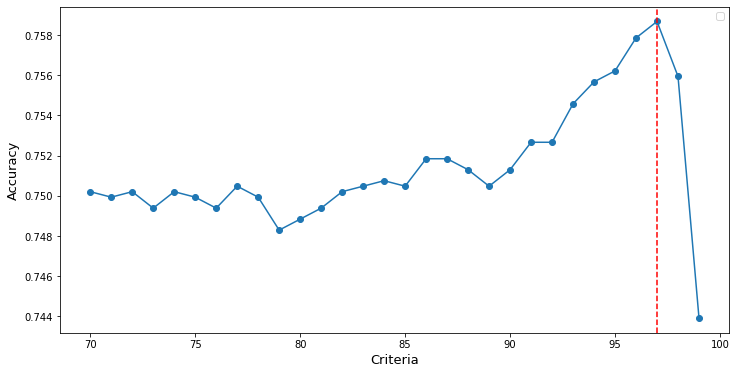

In [496]:
plt.figure(figsize=(12,6))
Acc=[]
for th in range(70,100):
  count,Accuracy,F1_score,Recall,log_model=self_training(X.values,y.values,X_unlabeled,X_test.values,y_test.values,thresh=th/100)
  Acc.append(Accuracy[-1])
plt.plot(np.arange(70,100),Acc,marker='o')
plt.xlabel('Criteria',size=13)
plt.ylabel('Accuracy',size=13)
plt.axvline(70+Acc.index(max(Acc)), color='red',ls='--')
plt.legend()

#F1_score vs Criteria

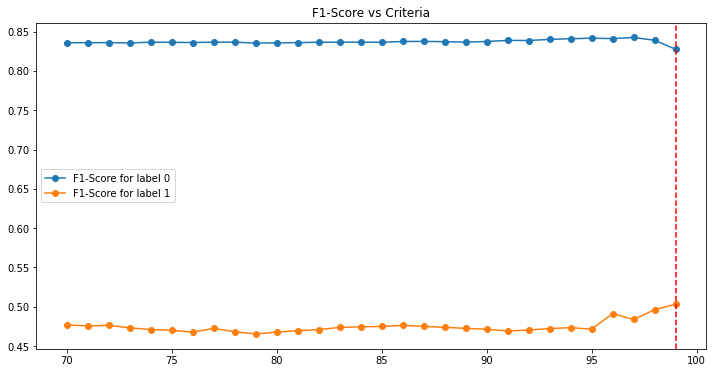

In [510]:
plt.figure(figsize=(12,6))
F1_label0=[]
F1_label1=[]
for th in range(70,100):
  count,Accuracy,F1_score,Recall,log_model=self_training(X.values,y.values,X_unlabeled,X_test.values,y_test.values,thresh=th/100)
  F1_label0.append(F1_score[-1,:][0])
  F1_label1.append(F1_score[-1,:][1])
plt.plot(np.arange(70,100),F1_label0,marker='o',label='F1-Score for label 0')
plt.plot(np.arange(70,100),F1_label1,marker='o',label='F1-Score for label 1')
plt.axvline(70+F1_label1.index(max(F1_label1)), color='red',ls='--')
plt.title("F1-Score vs Criteria")
plt.legend()

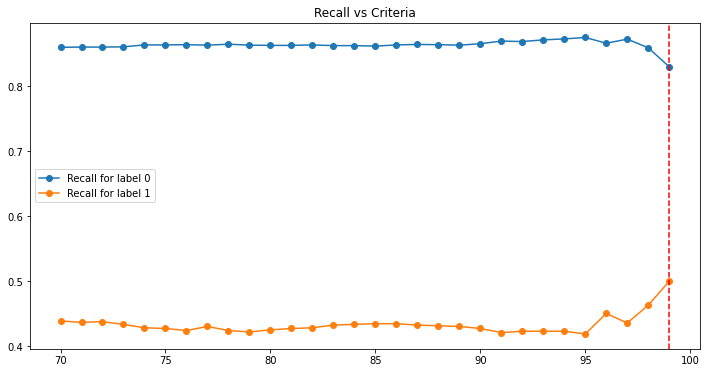

In [524]:
plt.figure(figsize=(12,6))
Recall0=[]
Recall1=[]
for th in range(70,100):
  count,Accuracy,F1_score,Recall,log_model=self_training(X.values,y.values,X_unlabeled,X_test.values,y_test.values,thresh=th/100)
  Recall0.append(Recall[-1,:][0])
  Recall1.append(Recall[-1,:][1])
plt.plot(np.arange(70,100),Recall0,marker='o',label='Recall for label 0')
plt.plot(np.arange(70,100),Recall1,marker='o',label='Recall for label 1')
plt.axvline(70+Recall1.index(max(Recall1)), color='red',ls='--')
plt.title("Recall vs Criteria")
plt.legend()

#Number of labeled data versus Iteration for severals Criteria

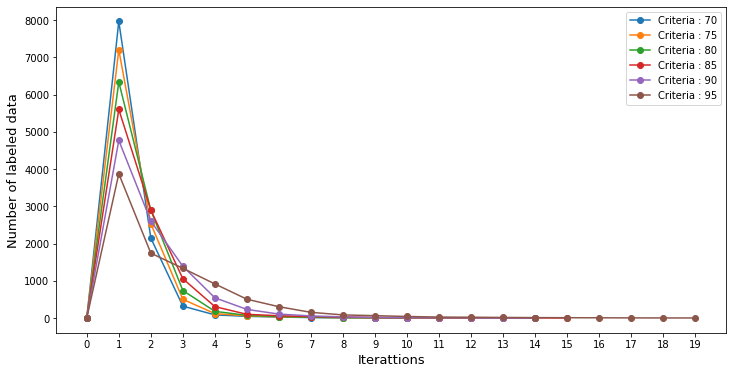

In [499]:
plt.figure(figsize=(12,6))
for th in range(70,100,5):
  count,Accuracy,F1_score,Recall,log_model=self_training(X.values,y.values,X_unlabeled,X_test.values,y_test.values,thresh=th/100)
  plt.plot(np.arange(0,len(count)),count,marker='o',label=f"Criteria : {th}")
plt.xlabel('Iterattions',size=13)
plt.ylabel('Number of labeled data',size=13)
plt.xticks(np.arange(0,len(count)))
plt.legend()

#**Best model confusion**

#Best found by F1-score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


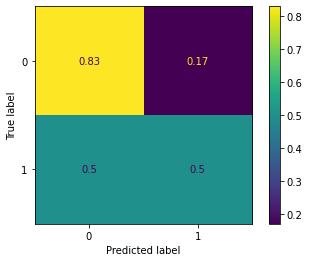

In [508]:
count,Accuracy,F1_score,Recall,log_model=self_training(X.values,y.values,X_unlabeled,X_test.values,y_test.values,thresh=0.99)
plot_confusion_matrix(log_model,X_test,y_test,normalize='true');

#Best found by Accuracy-score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


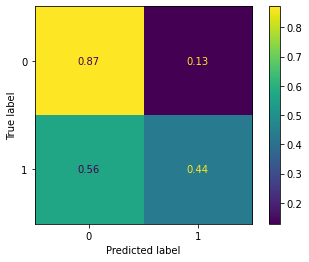

In [514]:
count,Accuracy,F1_score,Recall,log_model=self_training(X.values,y.values,X_unlabeled,X_test.values,y_test.values,thresh=0.97)
plot_confusion_matrix(log_model,X_test,y_test,normalize='true');